# Exploratory Data Analysis (EDA) & ModelBuilding

## 1. Reading and Understanding the Dataset
- Load the dataset and display the first few rows.
- Analyze the shape and data types of the columns.
- Data Cleaning

In [2]:
# Standard Library Imports
import warnings

# Third-Party Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Statsmodels Imports
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
warnings.filterwarnings('ignore')

# Configure visualizations (if needed)
sns.set(style='whitegrid') # Optional: Configure Seaborn style

# Set random seed for reproducibility (if using random operations)
np.random.seed(42)

In [3]:
# read data from day csv 
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the shape of dataset
df.shape

(730, 16)

In [5]:
# check info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check na columns on dataset
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
# Dropping columns that are not present in the DataFrame will cause an error,
# so we should check if they exist first.
columns_to_drop = ["instant", "dteday", "casual", "registered"]

# Drop only those columns that are actually in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

# Display the DataFrame after dropping columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# columns
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
# checkign unique count for each column
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

## 2. Mapping Categorial Features to appropriate String Values

In [12]:
import calendar

# Mapping converts the numbers to their corresponding season names
df["season"] = df["season"].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

# Transformation converts the numerical values into three-letter month abbreviations (e.g., "Jan", "Feb")
df["mnth"] = df["mnth"].apply(lambda x: calendar.month_abbr[x])

# Mapping changes these numerical values to their corresponding day names ("Sunday" to "Saturday")
df["weekday"] = df["weekday"].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mapping translates the values into descriptive labels such as "Clear", "Mist & Cloudy", etc.
df["weathersit"] = df["weathersit"].map({1: 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavy Snow & Rain'})

# Display the first few rows to verify the changes
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# printing dataset info after mapping categorial features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 3. Outlier Analysis

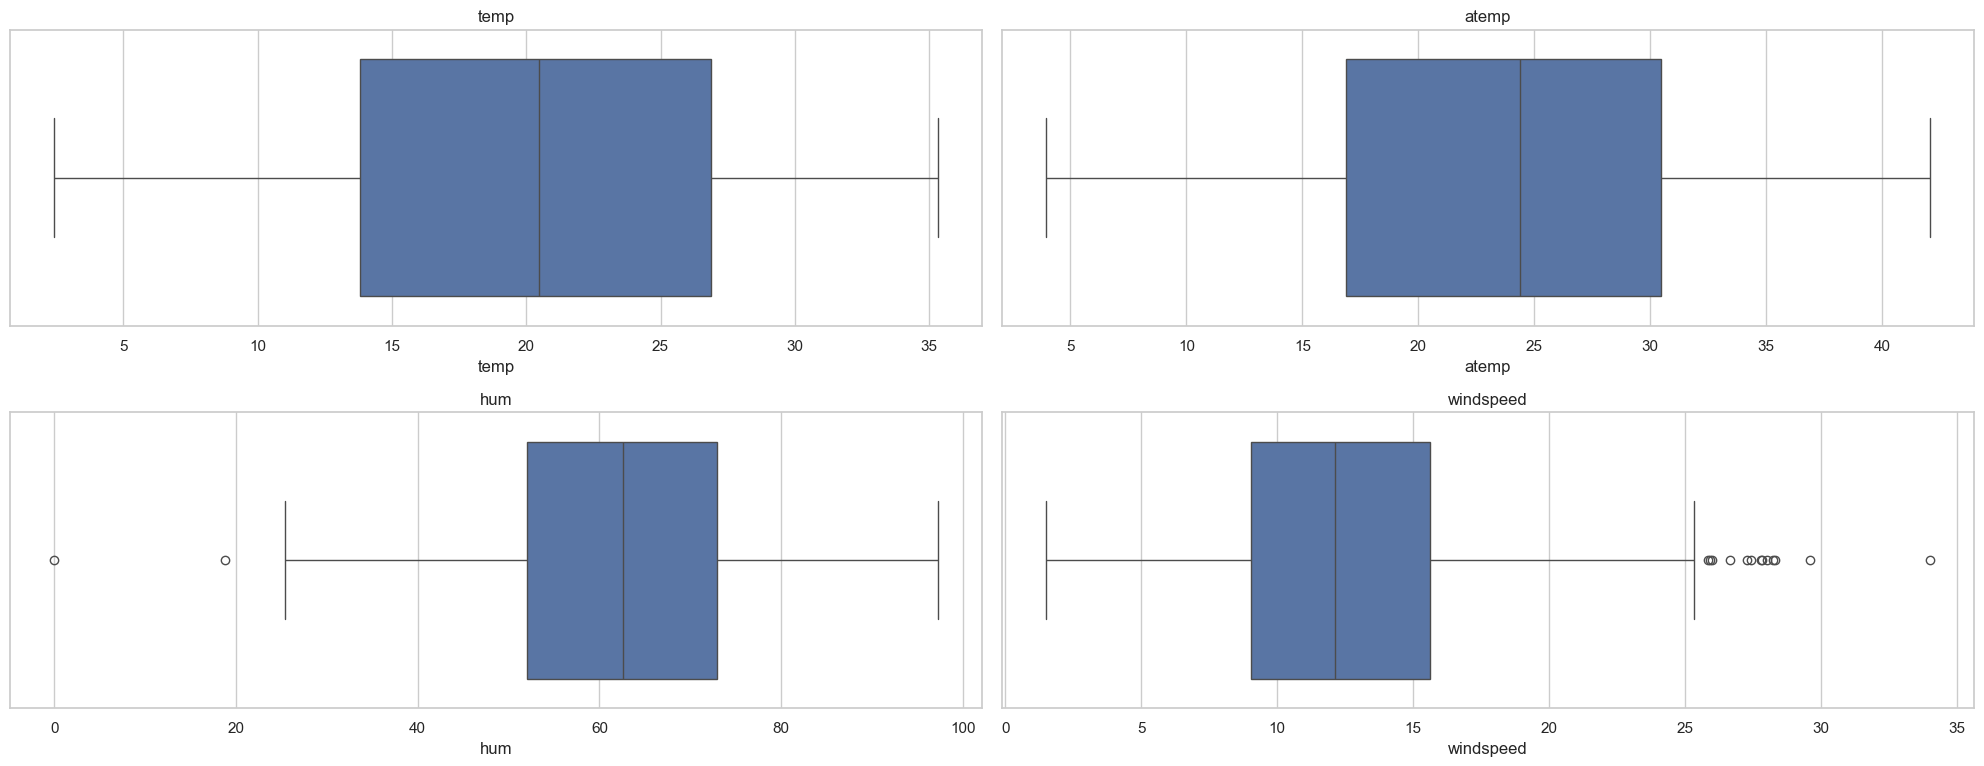

In [15]:
# List of numerical columns to check for outliers
num_col = ["temp", "atemp", "hum", "windspeed"]

def check_outlier():
    """
    Function to visualize outliers in numerical columns using boxplots.
    
    This function creates a series of boxplots for each numerical column 
    to help identify the presence of outliers. The boxplots are arranged 
    in a grid layout, and the function automatically handles multiple plots 
    across different figures if there are more than 8 columns.
    """
    
    # Initialize variables for subplot configuration
    i = 1  # Number of rows for subplots (not used directly)
    j = 1  # Current subplot number
    fig = plt.figure(figsize=(20, 15))  # Create a figure with specified dimensions

    # Iterate over each numerical column in the list
    for col in num_col:
        try:
            # Create subplots in a grid of 4 rows, 2 columns
            plt.subplot(4, 2, j)
            
            # Plot a boxplot for the current column to visualize outliers
            sns.boxplot(x=df[col])
            
            # Add a title to the current subplot with the column name
            plt.title(col)
            
            # Increment the subplot index for the next plot
            j = j + 1
            
            # If the subplot index exceeds 8 (the total number of subplots per figure), reset
            if j > 8:
                # Adjust layout to avoid overlap between plots
                plt.tight_layout()
                # Display the current figure with 8 subplots
                plt.show()
                # Create a new figure for the next set of subplots
                fig = plt.figure(figsize=(20, 15))
                # Reset subplot index
                j = 1
        except:
            # Handle any exceptions and print an error message for the current column
            print("Error for column", col)
    
    # If there are remaining plots not yet shown, display them
    if j != 1:
        # Adjust layout for the last set of plots
        plt.tight_layout()
        # Show the remaining plots
        plt.show()

# Call the function to check for outliers in the specified numerical columns
check_outlier()

### This Dataset have some outliers for windspeed column

#### Visualizing Numerical Columns


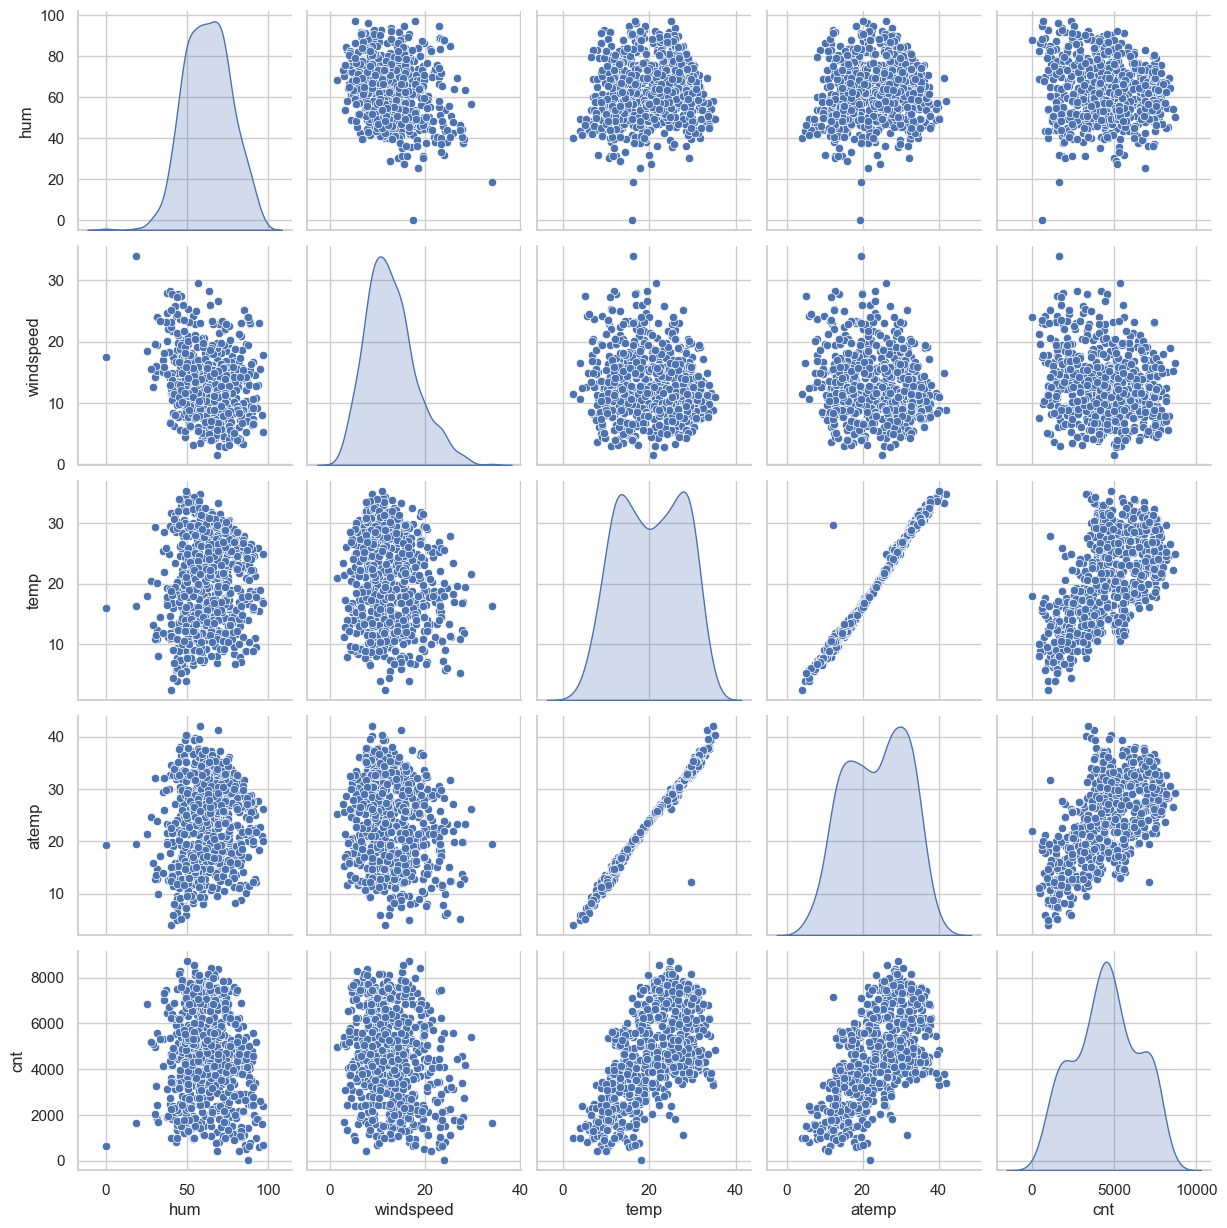

In [18]:
# Selecting a subset of numerical columns for analysis
numeric_col = df[['hum', 'windspeed', 'temp', 'atemp', 'cnt']]

# Creating a pair plot to visualize relationships between numerical variables
sns.pairplot(numeric_col, diag_kind='kde')

# Display the plot
plt.show()

#### Pair Plot Analysis

The pair plot reveals the following insights:

1. **Temperature and Apparent Temperature**: There is a strong linear correlation between `temp` and `atemp`.
2. **Humidity and Count (`cnt`)**: A slight negative relationship is visible, indicating higher humidity may correlate with lower rental counts.
3. **Temperature and Count**: A positive trend suggests that higher temperatures increase rental counts.
4. **Windspeed**: Shows no clear relationship with other variables.

### 4. Univariate Analysis

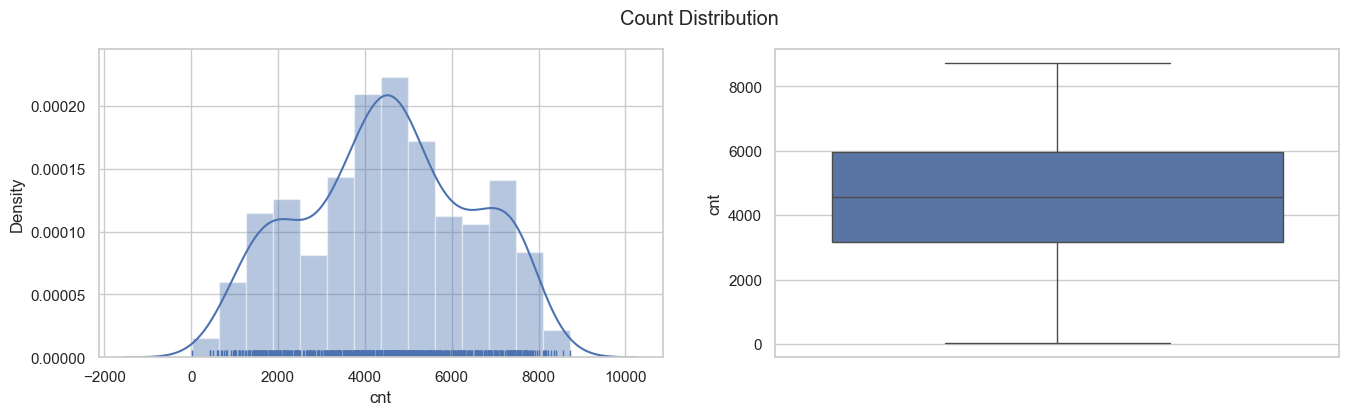

In [21]:
# Plotting the distribution and outliers of the 'cnt' variable
plt.figure(figsize=(16, 4))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.distplot(a=df.cnt, rug=True)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df.cnt)

# Title and display
plt.suptitle('Count Distribution')
plt.show()

- **Distribution**: `cnt` shows a roughly normal distribution, peaking around 4000-6000 rentals.
- **Boxplot**: No significant outliers, with a symmetric spread around the median, indicating balanced data.

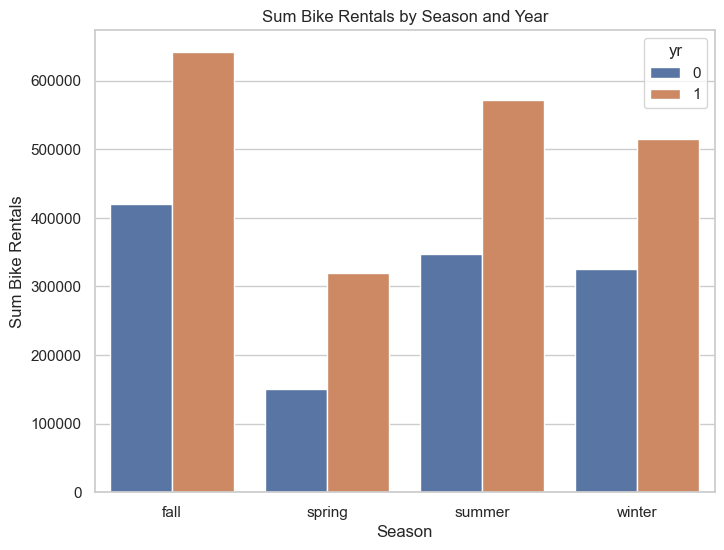

In [23]:
# Group data by season and year, summing the 'cnt' values
grouped_data = df.groupby(["season", "yr"])["cnt"].sum().reset_index()

# Bar plot to compare total bike rentals by season for each year
plt.figure(figsize=(8, 6))
sns.barplot(x="season", y="cnt", hue="yr", data=grouped_data)

# Add axis labels and title
plt.xlabel("Season")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by Season and Year")

# Display the plot
plt.show()

- **Analysis**: Bike rentals increased across all seasons in the second year (`yr = 1`).
- **Highest Growth**: Fall and summer saw the largest increases.
- **Least Rentals**: Spring had the lowest rental counts in both years.

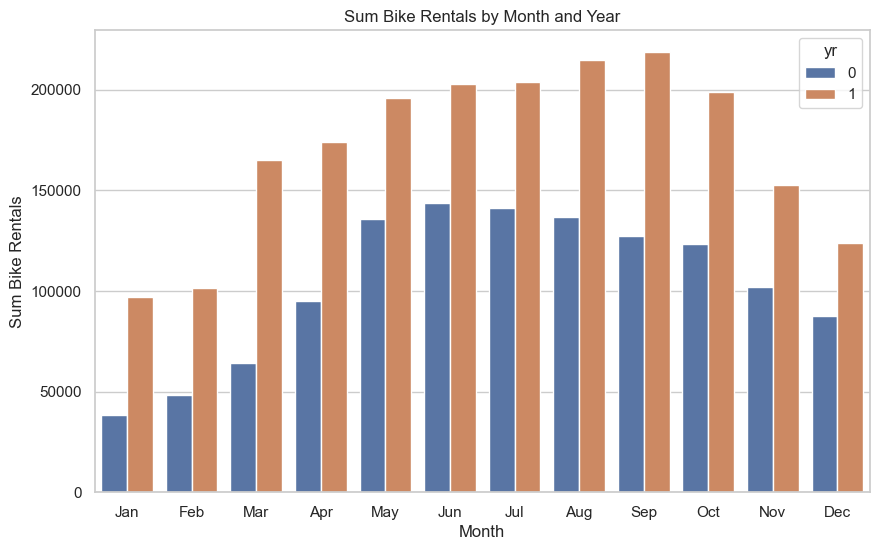

In [25]:
# Group data by month and year, summing the 'cnt' values
grouped_data = df.groupby(["mnth", "yr"])["cnt"].sum().reset_index()

# Bar plot to compare total bike rentals by month for each year
plt.figure(figsize=(10, 6))
sns.barplot(
    x="mnth", 
    y="cnt", 
    hue="yr", 
    data=grouped_data, 
    order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

# Add axis labels and title
plt.xlabel("Month")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by Month and Year")

# Display the plot
plt.show()

- Bike rentals increased significantly in the second year (yr = 1) across all months.
- Rentals peak during the summer months (June to September) for both years, indicating higher demand during warmer seasons.
- Lower rental counts are observed during winter months (December to February), suggesting seasonality impacts rental activity.

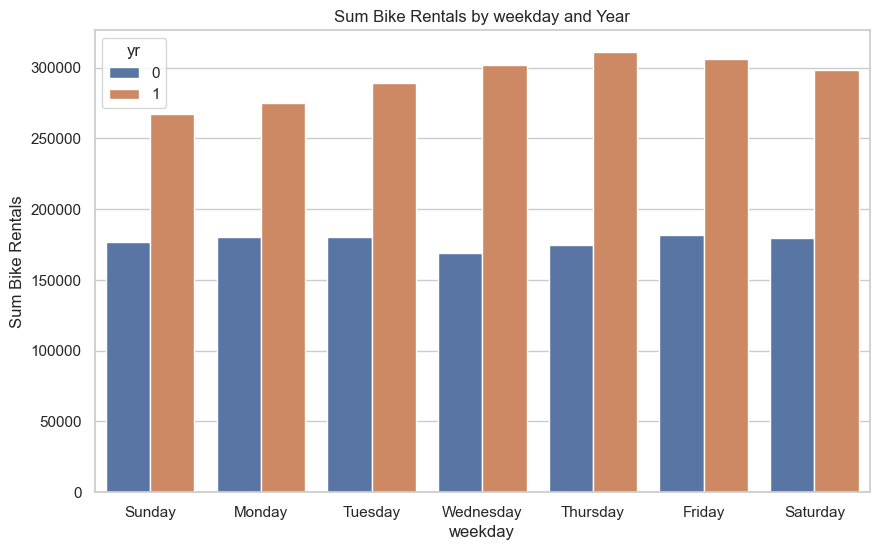

In [27]:
grouped_data = df.groupby(["weekday", "yr"])["cnt"].sum().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="weekday", y="cnt", hue="yr", data=grouped_data, order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

# Add labels and title
plt.xlabel("weekday")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by weekday and Year")

# Show plot
plt.show()


- **Analysis**: Bike rentals increased on all weekdays in the second year (`yr = 1`).
- **Consistent Pattern**: Rental counts are relatively stable across different weekdays, with slightly higher rentals midweek (Tuesday to Thursday).
- **Weekend Rentals**: Sunday and Saturday show lower totals compared to weekdays.

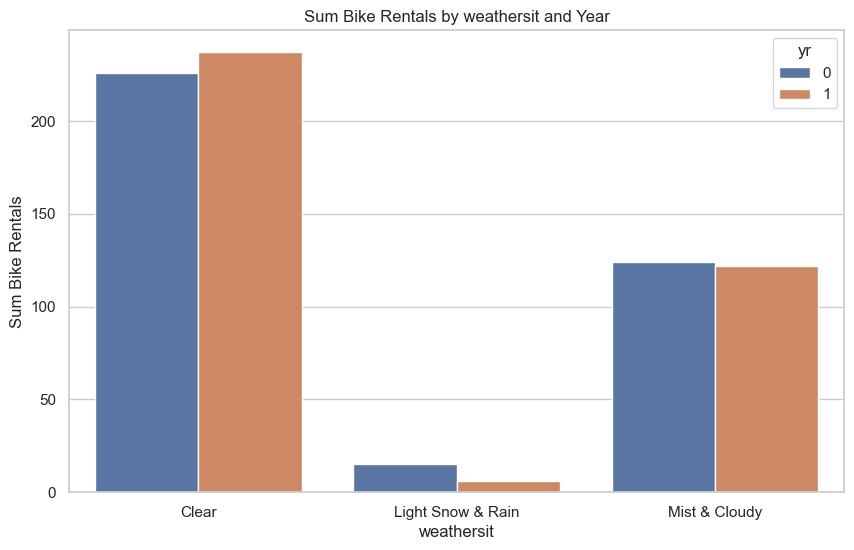

In [29]:
grouped_data = df.groupby(["weathersit", "yr"])["cnt"].count().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit", y="cnt", hue="yr", data=grouped_data)

# Add labels and title
plt.xlabel("weathersit")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by weathersit and Year")

# Show plot
plt.show()


- **Analysis**: Bike rentals were highest during clear weather for both years.
- **Light Snow & Rain**: Rentals were significantly lower compared to other weather conditions.
- **Mist & Cloudy**: Showed a moderate number of rentals, with a slight increase in the second year.

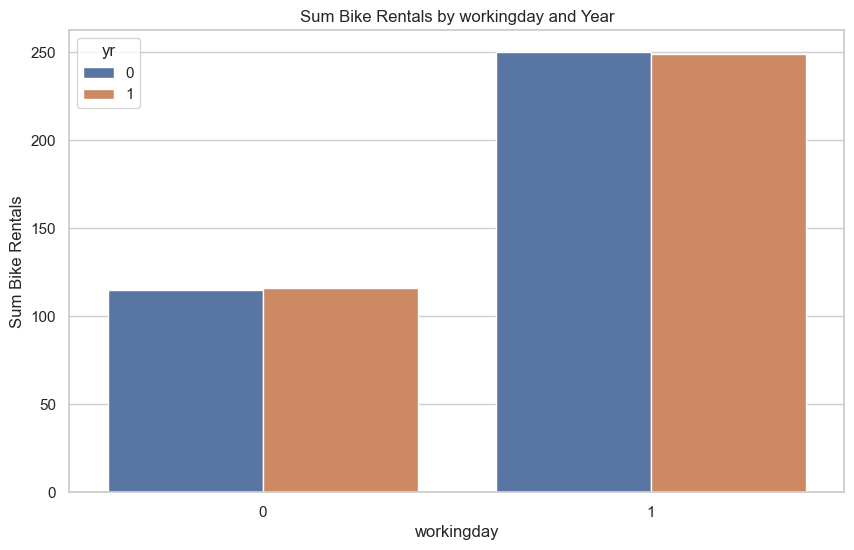

In [31]:
grouped_data = df.groupby(["workingday", "yr"])["cnt"].count().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="workingday", y="cnt", hue="yr", data=grouped_data)

# Add labels and title
plt.xlabel("workingday")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by workingday and Year")

# Show plot
plt.show()


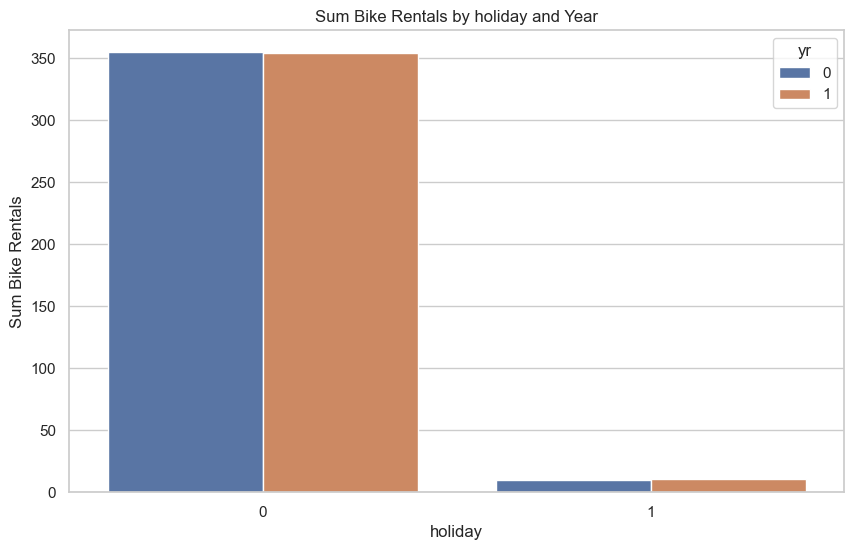

In [32]:
grouped_data = df.groupby(["holiday", "yr"])["cnt"].count().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="holiday", y="cnt", hue="yr", data=grouped_data)

# Add labels and title
plt.xlabel("holiday")
plt.ylabel("Sum Bike Rentals")
plt.title("Sum Bike Rentals by holiday and Year")

# Show plot
plt.show()


- **Analysis**: Bike rentals were significantly higher on non-holidays compared to holidays.
- **Holiday Rentals**: Showed minimal usage, with a slight increase in the second year (`yr = 1`).
- **Overall Trend**: Indicates that bike rentals are primarily used for regular commuting rather than holiday leisure.

### 4. Bivariate Analysis

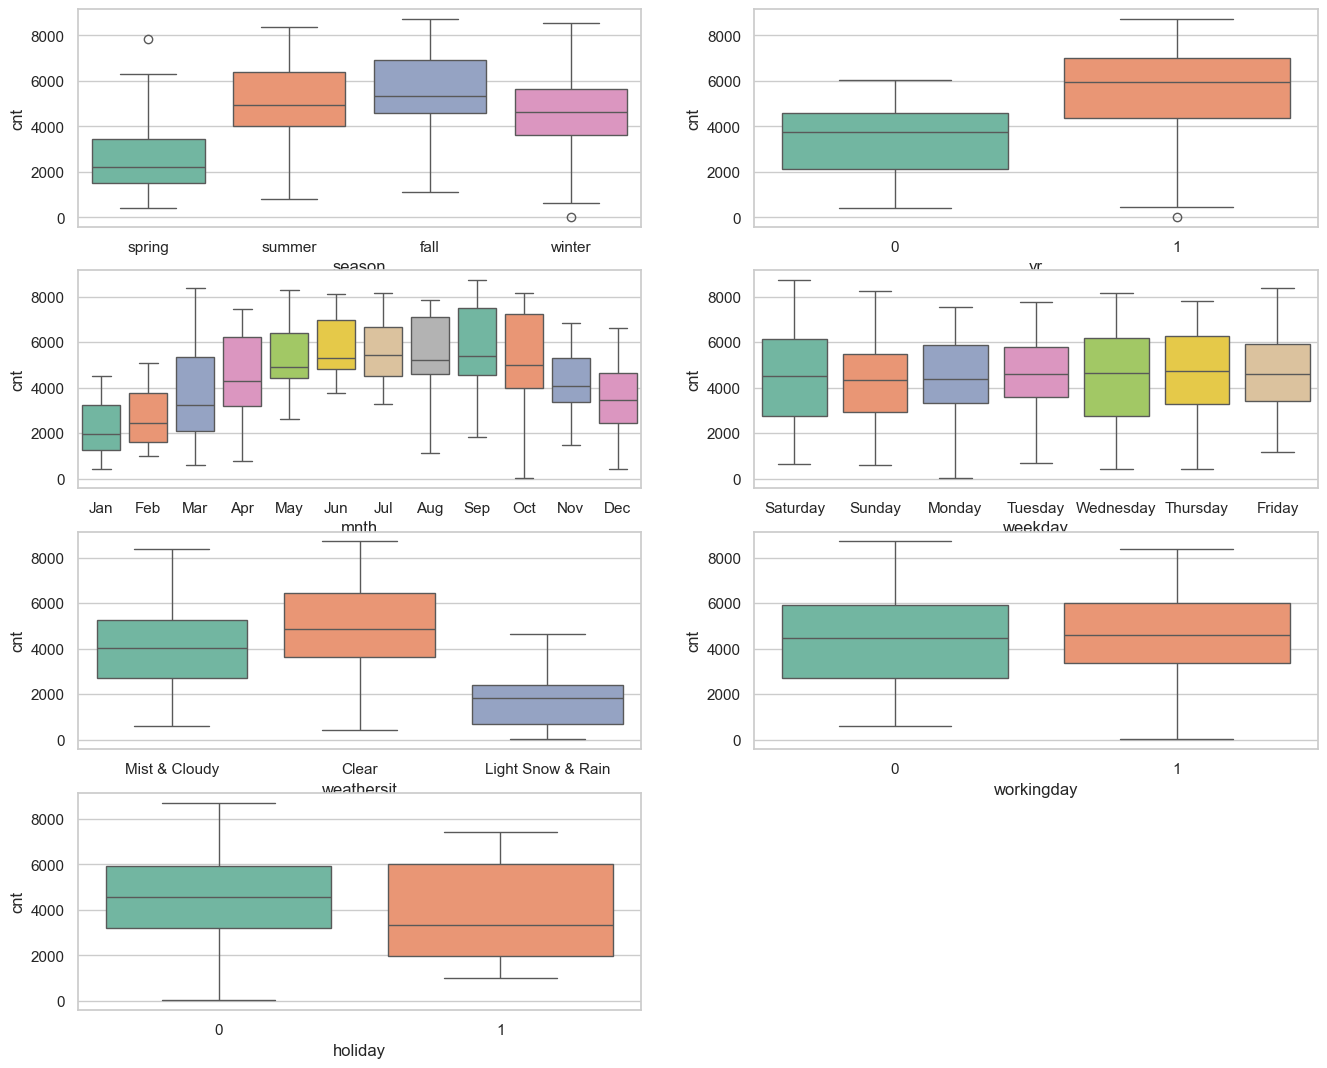

In [35]:
# Set color palette and figure size
palette = sns.color_palette("Set2", n_colors=15)
plt.figure(figsize=(16, 13))

# Plot boxplots for each categorical variable against 'cnt'
j = 1
cat_cols = ["season", "yr", "mnth", "weekday", "weathersit", "workingday", "holiday"]

for col in cat_cols:
    plt.subplot(4, 2, j)
    sns.boxplot(x=col, y='cnt', data=df, palette=palette)
    j += 1

# Display the plots
plt.show()

- **Season**: Bike rentals peak in summer and fall, with lower counts in spring and winter.
- **Year (`yr`)**: Rentals significantly increased in the second year.
- **Month**: Higher rentals from May to October, lower in winter months.
- **Weekday**: Consistent rentals across weekdays, slightly lower on weekends.
- **Weather**: Highest rentals in clear weather, lowest in light snow and rain.
- **Holiday**: Rentals are higher on non-holidays.
- **Working Day**: Slightly higher rentals on working days compared to non-working days.

### 5.Corelation 

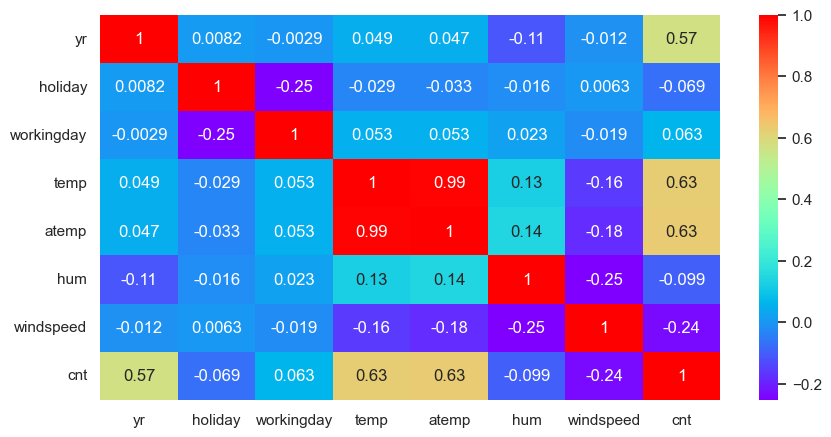

In [38]:
# Identify numerical columns in the DataFrame
num_col = []

# Loop through columns to find those with numerical data types
for col in df.columns:
    if ((df[col].dtype == "int32") or (df[col].dtype == "int64") or 
        (df[col].dtype == "float32") or (df[col].dtype == "float64")):
        num_col.append(col)

# Plot a heatmap to visualize the correlation matrix of numerical columns
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df[num_col].corr(), annot=True, cmap="rainbow")
plt.show()

- **Analysis**:
  - `cnt` (bike rentals) has a strong positive correlation with `temp` and `atemp` (~0.63), indicating higher rentals with warmer temperatures.
  - Year (`yr`) shows a moderate correlation with `cnt` (0.57), suggesting increased rentals in the second year.
  - Weak or negative correlations are observed with `humidity` and `windspeed`, indicating a minor effect on rentals.
  - `temp` and `atemp` are highly correlated (0.99), suggesting redundancy.

In [40]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [41]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### 5. Get Dummy Values for Regression

In [43]:
# Convert categorical columns into dummy/indicator variables
df = pd.get_dummies(
    data=df, 
    columns=["season", "mnth", "weekday", "weathersit"], 
    drop_first=True,  # Avoids multicollinearity by dropping the first category for each column
    dtype=int         # Ensures the new columns are of integer type
)

# Print the number of columns in the DataFrame after encoding
print(len(df.columns))

30


In [44]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [45]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# ModelBuilding

### 1. Split the dataset into training and testing sets

In [48]:
from sklearn.model_selection import train_test_split


# 'train_size=0.7' means 70% of the data is used for training and 30% for testing
# 'random_state=100' ensures reproducibility of the split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [49]:
# verifying train and split data size
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### 1. Rescaling the Features Using MinMaxScaler      (Normalization)

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Numerical columns to scale
num_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]

# Scale columns to [0, 1] range
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [52]:
# verifying the min and max value for each features.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Checking correlation between features in the training dataset

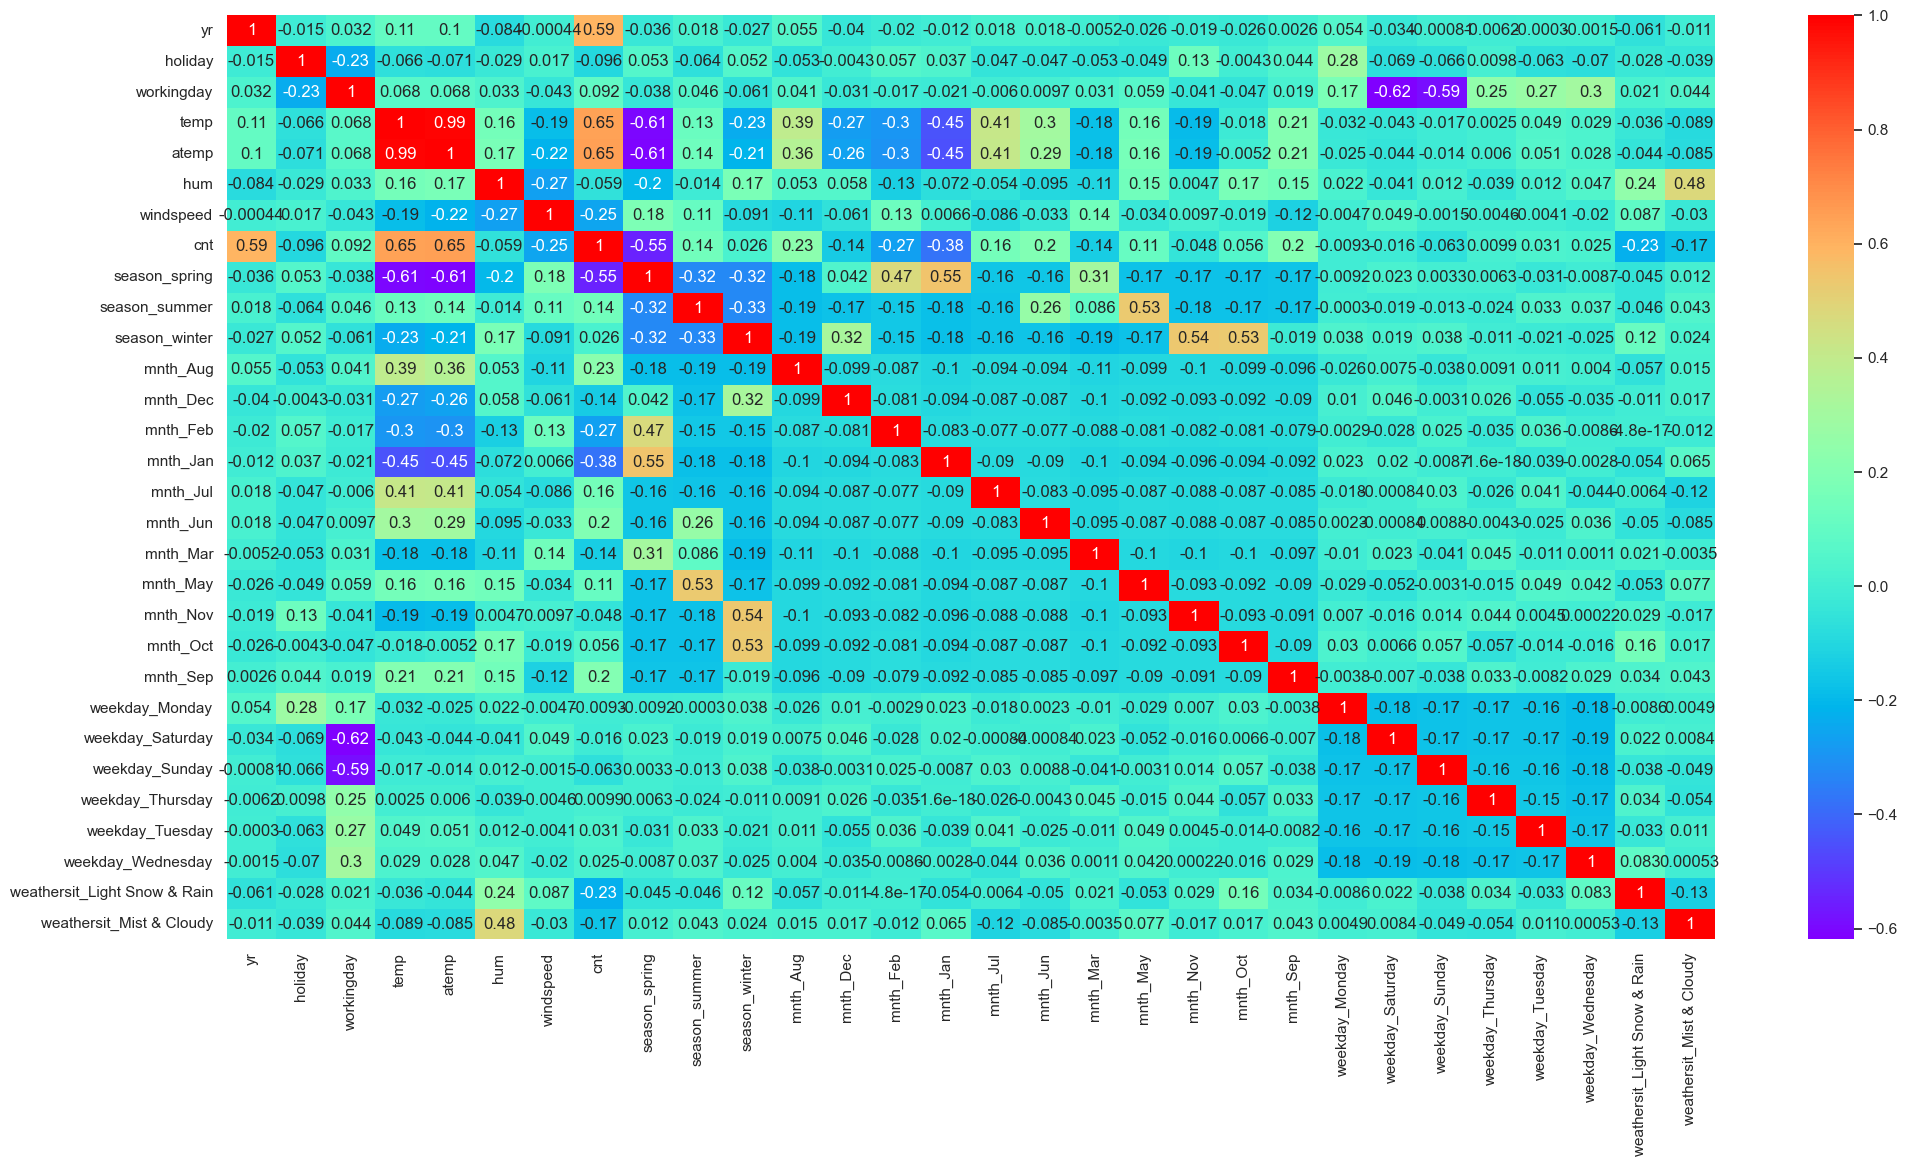

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a heatmap to visualize the correlation matrix
fig = plt.figure(figsize=(24, 12))  
sns.heatmap(df_train[df.columns].corr(), annot=True, cmap="rainbow")  

plt.show()  # Show the heatmap

#### Correlation Analysis
- High correlation is observed between `temp` and `atemp`, indicating a strong relationship.
- `cnt` (count) has a moderate positive correlation with `temp` and `atemp`, suggesting higher bike rentals during warmer weather.
- `hum` (humidity) and `windspeed` show weak correlations with `cnt`.
- There are no extreme correlations that suggest multicollinearity issues among most features.

### 4.Build Model Using Recursive Feature Elimination (RFE)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Separate target variable and features
y_train = df_train.pop('cnt')
X_train = df_train

# Initialize and fit Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Perform RFE to select top 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
#RFE ranking for each features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 12),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 15),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [59]:
# RFE selected columns
rfe_selected_cols = list(X_train.columns[rfe.support_])

# columns selected By RFE
print(rfe_selected_cols)

['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Jan', 'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy']


In [60]:
X_train[rfe_selected_cols]

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_winter,mnth_Aug,mnth_Jan,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,1,0,0,0,0,0,0,0,1


In [61]:
# X_train_rfe will contain only 15 columns which are selected by RFE
X_train_rfe = X_train[rfe_selected_cols]

# Build Model

In [63]:
def build_model(X):
  X_train_sm = sm.add_constant(X)
  lm = sm.OLS(y_train, X_train_sm).fit()
  print(lm.summary())
  
def get_vif(X):
    vif_df = X
    vif = pd.DataFrame()
    vif['Features'] = vif_df.columns
    vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))  

## MODEL-1

In [65]:
# building a model with RFE features 
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.01e-191
Time:                        15:11:08   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### OLS Regression Results Analysis
- **R-squared = 0.847**: The model explains 84.7% of the variance in bike rentals, indicating a good fit.
- **Significant predictors**: `yr`, `workingday`, `temp`, `hum`, `windspeed`, `season_summer`, `season_winter`, `mnth_Aug`, `weekday_Saturday`, `weathersit_Light Snow & Rain`, and `weathersit_Mist & Cloudy` have p-values < 0.05, showing a statistically significant effect on bike rentals.
- **Positive impact**: Variables like `yr`, `workingday`, `temp`, `season_summer`, and `season_winter` increase bike rentals.
- **Negative impact**: `hum`, `windspeed`, and adverse weather conditions (`Light Snow & Rain`, `Mist & Cloudy`) decrease bike rentals.
- **Multicollinearity check**: The condition number suggests potential multicollinearity but not severe.

In [67]:
get_vif(X_train_rfe)

                        Features    VIF
2                     workingday  34.00
11              weekday_Saturday   8.38
12                weekday_Sunday   8.20
1                        holiday   2.24
3                           temp   1.94
4                            hum   1.88
7                  season_winter   1.58
14      weathersit_Mist & Cloudy   1.56
9                       mnth_Jan   1.55
6                  season_summer   1.48
8                       mnth_Aug   1.45
13  weathersit_Light Snow & Rain   1.24
10                      mnth_Sep   1.22
5                      windspeed   1.19
0                             yr   1.03


In [68]:
# need to drop workingday  as its VIF is 34.00
X_train_rfe.drop("workingday", axis=1, inplace=True)

## MODEL - 2

In [70]:
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.01e-191
Time:                        15:11:08   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### OLS Regression Results Analysis
- **R-squared = 0.847**: The model explains 84.7% of the variation in bike rentals, indicating a good fit.
- **Significant predictors**: `yr`, `holiday`, `temp`, `hum`, `windspeed`, `season_summer`, `season_winter`, `mnth_Aug`, `mnth_Sep`, `weekday_Sunday`, `weathersit_Light Snow & Rain`, and `weathersit_Mist & Cloudy` have p-values < 0.05, indicating they significantly impact bike rentals.
- **Positive effects**: Variables like `yr`, `temp`, `season_summer`, and `season_winter` positively influence bike rentals.
- **Negative effects**: Factors such as `holiday`, `hum`, `windspeed`, and adverse weather conditions (e.g., `Light Snow & Rain`) reduce bike rentals.

In [72]:
get_vif(X_train_rfe)

                        Features    VIF
3                            hum  18.41
2                           temp  11.43
4                      windspeed   3.68
13      weathersit_Mist & Cloudy   2.17
6                  season_winter   2.05
0                             yr   2.04
5                  season_summer   1.96
7                       mnth_Aug   1.60
8                       mnth_Jan   1.55
9                       mnth_Sep   1.32
10              weekday_Saturday   1.23
11                weekday_Sunday   1.23
12  weathersit_Light Snow & Rain   1.19
1                        holiday   1.05


In [73]:
# need to drop hum  as its VIF is 18.00
X_train_rfe.drop("hum", axis=1, inplace=True)

### Build the model with RFE and Manual Approach

In [75]:
lr1 = LinearRegression()
lr1.fit(X_train_rfe, y_train)

LinearRegression()

In [76]:
X_train_rfe

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Aug,mnth_Jan,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0,1,0,0,1
111,0,0,0.345824,0.380981,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,1,0,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,0,0,0,1,0,0,1
79,0,0,0.462664,0.529881,1,0,0,0,0,0,0,0,1


In [77]:
y_train_pred = lr1.predict(X_train_rfe)

### Residual Analysis on Actual Vs Predicted on Train Data

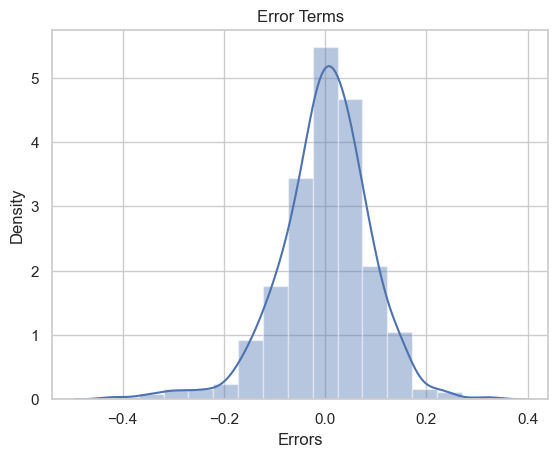

In [79]:
sns.distplot(y_train - y_train_pred, bins=15)
plt.title("Error Terms")
plt.xlabel("Errors")
plt.show()

### Residual Analysis
- The residuals (errors) are approximately normally distributed, centered around zero, indicating that the model's predictions are unbiased.
- The bell-shaped curve suggests that the errors are randomly distributed, which is a good sign for the model's accuracy and indicates that the linear regression assumptions hold.
- Slight skewness may be present, but overall, the residual pattern is acceptable.

### Verifying the Residuals using QQ Plot

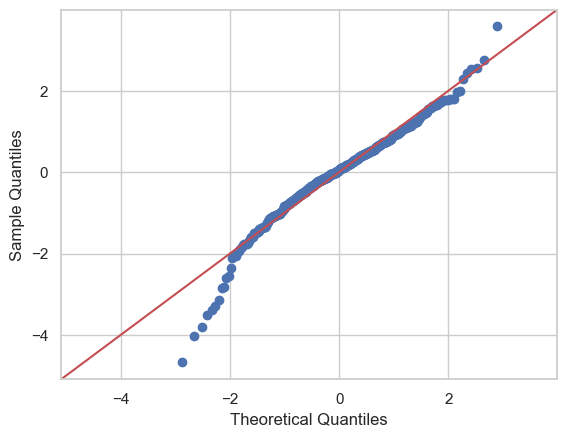

In [82]:
# Lets verify same using QQ Plot
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### QQ Plot Analysis
- The QQ plot shows that the residuals follow a nearly straight line along the 45-degree reference line, indicating that they are approximately normally distributed.
- Deviations at the tails suggest some mild departure from normality, but overall, the linear regression assumptions are reasonably met.

### Homoscedasticity

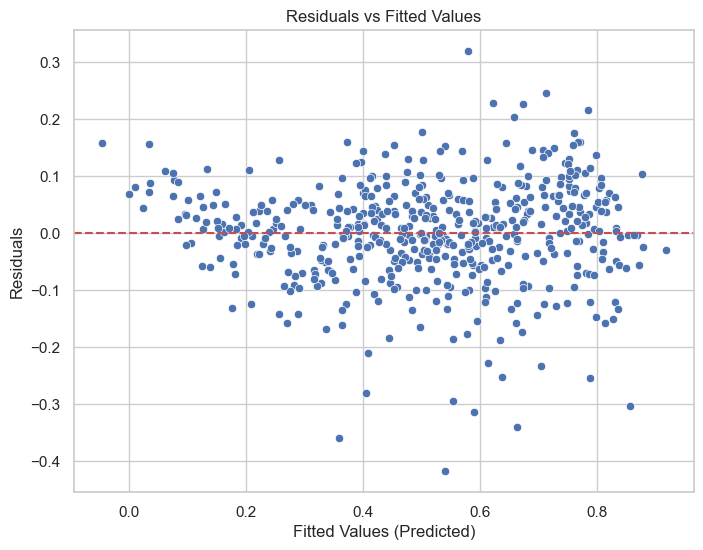

In [85]:
# Plotting the residuals vs fitted values
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.show()

### Homoscedasticity Analysis
- The residuals are scattered randomly around the horizontal line (zero), indicating no clear pattern, which suggests homoscedasticity (constant variance).
- The randomness of the spread supports the assumption that the error terms have constant variance across different levels of predicted values.
- No major funnel shape or systematic pattern is observed, which is a good sign for the linear regression model's validity.

### Calculating r2 score on training Data

In [88]:
r2_score(y_true= y_train, y_pred=y_train_pred)

0.841680404235848

### Using MinMaxScaler on Test Data

In [90]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [91]:
# verifying min max scaling have been applied. 
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
y_test = df_test.pop("cnt")
X_test = df_test

y_test_pred= lr1.predict(X_test[X_train_rfe.columns])

### Calculating R2 score on testing Data

In [94]:
r2_score(y_pred=y_test_pred, y_true=y_test)

0.795272489459463

### Evaluating the model

#### Regression Plot on Test Data

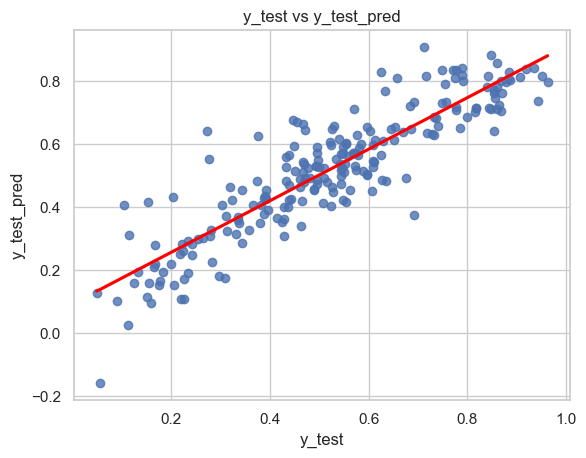

In [97]:
# Visualizing the fit on the test data

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=20, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

### Regression Plot Analysis
- The scatter plot shows a strong positive linear relationship between the actual (`y_test`) and predicted (`y_test_pred`) values, indicating a good model fit.
- The red regression line aligns well with the data points, suggesting that the model captures the trend in the test data effectively.
- Some scatter around the line is observed, but the overall alignment supports the model's predictive accuracy.

### Homoscedasticity on test Data

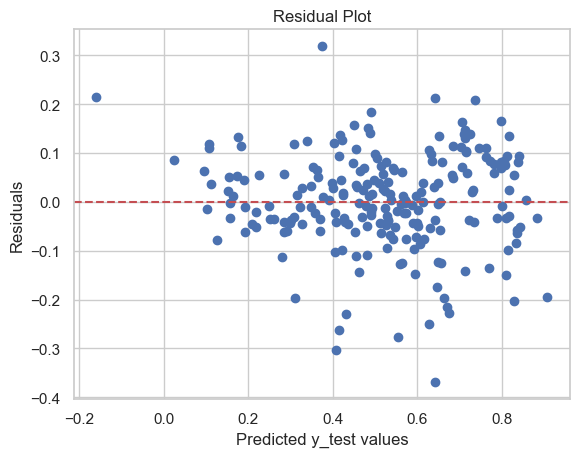

In [100]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted y_test values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Homoscedasticity Analysis on Test Data
- The residuals are randomly scattered around the horizontal line at zero, indicating that the variance of errors is constant across different levels of predicted values.
- No clear pattern or funnel shape is observed, suggesting that the homoscedasticity assumption is satisfied.
- This randomness supports the validity of the linear regression model on the test data.